<a href="https://colab.research.google.com/github/rahulmnair1997/US-accidents-data-analysis/blob/master/hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install scikit-optimize

In [15]:
!pip install xgboost

In [16]:
# load libraries
import pandas as pd
from scipy.optimize import brute
from skopt import forest_minimize,gbrt_minimize,dummy_minimize
from skopt import callbacks
from sklearn.metrics import fbeta_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [17]:
# load data
map_quest = pd.read_csv("/content/drive/My Drive/map_quest.csv")

In [18]:
# resample the data
df_bl = pd.concat([map_quest[map_quest['Severity']==0].sample(10000, replace = True), 
                   map_quest[map_quest['Severity']==1].sample(10000, replace = True),
                   map_quest[map_quest['Severity']==2].sample(10000, replace = True),
                   map_quest[map_quest['Severity']==3].sample(10000, replace = True),
                   map_quest[map_quest['Severity']==4].sample(10000, replace = True)], axis=0)

In [19]:
df_bl

,Unnamed: 0,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Duration,Visibility(mi)),County_freq,Zipcode_freq,Airport_Code_freq,Street_freq,Amenity_1,Crossing_1,Junction_1,Railway_1,Side_L,Side_R,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,...,Weather_Condition_Small Hail,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Snow Grains,Weather_Condition_Snow Showers,Weather_Condition_Squalls,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Thunderstorms and Snow,Weather_Condition_Volcanic Ash,Weather_Condition_Widespread Dust,Wind_Direction_Clear,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_Variable,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1053662,1098128,201.0,0,29.445002,-98.360748,0.00,79.0,4.615121,3.439456,2.302585,1.916923,45,10.0,1.235181,1.271668,1.063890,1.112792,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
359731,373650,201.0,0,42.677380,-73.598572,0.01,44.1,3.401197,3.447763,2.397895,1.722767,44,10.0,3.777041,0.472471,3.516897,2.661058,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
564714,587453,201.0,0,34.278980,-83.901428,0.00,52.0,4.543295,3.442659,2.397895,2.208274,60,10.0,1.096383,3.294723,0.895795,6.880720,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
933813,972392,201.0,0,37.745972,-122.404305,1.06,59.0,3.806662,3.438493,2.302585,2.277434,29,10.0,1.448528,0.792044,2.625996,2.141522,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
733141,762713,201.0,0,35.413925,-97.441299,0.00,36.7,4.465908,3.415758,2.302585,2.525729,30,10.0,2.070006,2.593838,1.111324,2.060947,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674339,701485,201.0,4,32.462265,-99.835823,0.87,32.0,4.430817,3.433665,2.397895,1.722767,29,10.0,3.124623,4.442056,2.511312,5.518673,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
783523,815256,201.0,4,25.931620,-80.204811,1.36,88.0,3.912023,3.439456,2.397895,2.322388,44,10.0,2.035041,4.387260,2.604411,1.725062,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
837917,871955,201.0,4,30.155022,-95.215393,3.19,93.0,4.043051,3.432696,2.397895,1.916923,59,10.0,2.665618,3.592677,1.777500,1.867105,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1357803,1417714,406.0,4,25.780846,-80.199883,0.63,75.0,4.553877,3.437851,2.079442,1.722767,29,10.0,0.185089,0.140621,0.309572,0.948392,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
# split X, y
X = df_bl.drop('Severity', axis=1)
y= df_bl['Severity']

In [21]:
X.isnull().values.any()

True

In [22]:
# missing value percentage calculation
missing = pd.DataFrame(df_bl.isnull().sum()).reset_index()
missing.columns = ['Labels', 'Percentage']
missing['Percentage'] = missing['Percentage'].apply(lambda x: (x/df_bl.shape[0])*100)
missing.loc[missing['Percentage'] > 0, :].sort_values(by=['Percentage'], ascending=False)

,Labels,Percentage
7,Humidity(%),3.502
8,Pressure(in),3.502
9,Visibility(mi),3.502
10,Wind_Speed(mph),3.502
13,County_freq,3.502
14,Zipcode_freq,3.502
15,Airport_Code_freq,3.502
16,Street_freq,3.502


In [23]:
df_bl = df_bl.dropna(subset=['Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
                                    'County_freq', 'Zipcode_freq', 'Airport_Code_freq', 'Street_freq'])

In [24]:
X = df_bl.drop('Severity', axis=1)

In [25]:
y= df_bl['Severity']

In [26]:
# Standardizing the features based on unit variance
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [27]:
# split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Logistic Regression

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 449.8235
Function value obtained: -0.6429
Current minimum: -0.6429
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 193.7769
Function value obtained: -0.6368
Current minimum: -0.6429
Iteration No: 3 started. Evaluating function at random point.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 155.3954
Function value obtained: -0.6413
Current minimum: -0.6429
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 454.3594
Function value obtained: -0.6429
Current minimum: -0.6429
Iteration No: 5 started. Evaluating function at random point.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 155.1333
Function value obtained: -0.6415
Current minimum: -0.6429
Iteration No: 6 started. Evaluating function at random point.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 155.6279
Function value obtained: -0.6415
Current minimum: -0.6429
Iteration No: 7 started. Evaluating function at random point.
Iteration No: 7 ended. Evaluation done at random point.
Time taken: 52.3490
Function value obtained: -0.6257
Current minimum: -0.6429
Iteration No: 8 started. Evaluating function at random point.
Iteration No: 8 ended. Evaluation done at random point.
Time taken: 457.6202
Function value obtained: -0.6429
Current minimum: -0.6429
Iteration No: 9 started. Evaluating function at random point.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 454.0960
Function value obtained: -0.6429
Current minimum: -0.6429
Iteration No: 10 started. Evaluating function at random point.
Iteration No: 10 ended. Evaluation done at random point.
Time taken: 438.0567
Function value obtained: -0.6425
Current minimum: -0.6429
Iteration No: 11 started. Searching for the next optimal point.
Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 439.4435
Function value obtained: -0.6425
Current minimum: -0.6429
Iteration No: 12 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 454.0628
Function value obtained: -0.6429
Current minimum: -0.6429
Iteration No: 13 started. Searching for the next optimal point.
Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 447.8783
Function value obtained: -0.6425
Current minimum: -0.6429
Iteration No: 14 started. Searching for the next optimal point.
Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 9.8250
Function value obtained: -0.6044
Current minimum: -0.6429
Iteration No: 15 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 455.2426
Function value obtained: -0.6429
Current minimum: -0.6429
Iteration No: 16 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 454.7962
Function value obtained: -0.6429
Current minimum: -0.6429
Iteration No: 17 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 449.1315
Function value obtained: -0.6425
Current minimum: -0.6429
Iteration No: 18 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 443.1724
Function value obtained: -0.6425
Current minimum: -0.6429
Iteration No: 19 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 450.7987
Function value obtained: -0.6429
Current minimum: -0.6429
Iteration No: 20 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 450.5933
Function value obtained: -0.6429
Current minimum: -0.6429
Iteration No: 21 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 453.5832
Function value obtained: -0.6429
Current minimum: -0.6429
Iteration No: 22 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 445.4356
Function value obtained: -0.6425
Current minimum: -0.6429
Iteration No: 23 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 444.0988
Function value obtained: -0.6425
Current minimum: -0.6429
Iteration No: 24 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 442.7040
Function value obtained: -0.6425
Current minimum: -0.6429
Iteration No: 25 started. Searching for the next optimal point.
Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 192.8063
Function value obtained: -0.6368
Current minimum: -0.6429
Iteration No: 26 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 448.6865
Function value obtained: -0.6429
Current minimum: -0.6429
Iteration No: 27 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 443.7824
Function value obtained: -0.6425
Current minimum: -0.6429
Iteration No: 28 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 451.8799
Function value obtained: -0.6429
Current minimum: -0.6429
Iteration No: 29 started. Searching for the next optimal point.
Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 389.8590
Function value obtained: -0.6431
Current minimum: -0.6431
Iteration No: 30 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 389.6936
Function value obtained: -0.6431
Current minimum: -0.6431
Iteration No: 31 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 389.3623
Function value obtained: -0.6431
Current minimum: -0.6431
Iteration No: 32 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 388.5694
Function value obtained: -0.6431
Current minimum: -0.6431
Iteration No: 33 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 451.8684
Function value obtained: -0.6429
Current minimum: -0.6431
Iteration No: 34 started. Searching for the next optimal point.
Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 48.7274
Function value obtained: -0.6246
Current minimum: -0.6431
Iteration No: 35 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 450.3183
Function value obtained: -0.6429
Current minimum: -0.6431
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 9.8672
Function value obtained: -0.6044
Current minimum: -0.6431
Iteration No: 37 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 450.6667
Function value obtained: -0.6429
Current minimum: -0.6431
Iteration No: 38 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 450.1599
Function value obtained: -0.6429
Current minimum: -0.6431
Iteration No: 39 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 451.4625
Function value obtained: -0.6429
Current minimum: -0.6431
Iteration No: 40 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 450.6840
Function value obtained: -0.6429
Current minimum: -0.6431
Iteration No: 41 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 449.9749
Function value obtained: -0.6429
Current minimum: -0.6431
Iteration No: 42 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 452.5717
Function value obtained: -0.6429
Current minimum: -0.6431
Iteration No: 43 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 449.8342
Function value obtained: -0.6429
Current minimum: -0.6431
Iteration No: 44 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 154.2178
Function value obtained: -0.6415
Current minimum: -0.6431
Iteration No: 45 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 154.8902
Function value obtained: -0.6415
Current minimum: -0.6431
Iteration No: 46 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 154.0823
Function value obtained: -0.6415
Current minimum: -0.6431
Iteration No: 47 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 154.1293
Function value obtained: -0.6414
Current minimum: -0.6431
Iteration No: 48 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 153.8648
Function value obtained: -0.6414
Current minimum: -0.6431
Iteration No: 49 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 450.0385
Function value obtained: -0.6429
Current minimum: -0.6431
Iteration No: 50 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 154.1238
Function value obtained: -0.6407
Current minimum: -0.6431
Maximimum recall found: 0.64311
Optimal parameters:
penalty: l2
C: 1
max_iter: 10000


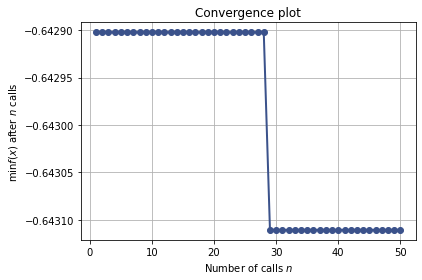

In [ ]:
# Bayesian Optimization
num_thread=50
params = ['penalty', 'C', 'max_iter']

#for model include item_Features
def objective(params):
    # unpack
    penalty, C, max_iter = params
    
    model_iii = LogisticRegression(penalty, dual=False, C=C, random_state=60616, solver='sag', max_iter=max_iter)
    model_iii.fit(X_train, y_train)
    
    y_pred = model_iii.predict(X_test)
    fbeta = fbeta_score(y_test, y_pred, beta=0.5, average='weighted')

    out = -fbeta
    # Handle some numerical issue going on
    if np.abs(out + 1) < 0.01 or out < -1.0:
        return 0.0
    else:
        return out

space = [('l2', 'none'),
         (0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25),
         (1000, 10000, 100000),
        ]

try:
    res_fm = forest_minimize(objective, space, n_calls=50,
                     random_state=60616,base_estimator= 'RF',acq_func='PI',
                     verbose=True, n_jobs=num_thread)
except ValueError:
    print('Forest diverged, random search intialized')
    res_fm = dummy_minimize(objective, space, n_calls=30,
         random_state=60616,
         verbose=True)

print('Maximimum F_Beta found: {:6.5f}'.format(-res_fm.fun))
print('Optimal parameters:')

for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))
from skopt.plots import plot_convergence
plot_convergence(res_fm);

# Decision Tree

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1186
Function value obtained: -0.6516
Current minimum: -0.6516
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0970
Function value obtained: -0.6390
Current minimum: -0.6516
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1192
Function value obtained: -0.6351
Current minimum: -0.6516
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0924
Function value obtained: -0.6375
Current minimum: -0.6516
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.1473
Function value obtained: -0.7459
Current minimum: -0.7459
Iteration No: 6 started. 

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 0.4150
Function value obtained: -0.6861
Current minimum: -0.7459
Iteration No: 13 started. Searching for the next optimal point.
Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 0.4269
Function value obtained: -0.7121
Current minimum: -0.7459
Iteration No: 14 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.4335
Function value obtained: -0.7121
Current minimum: -0.7459
Iteration No: 15 started. Searching for the next optimal point.
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.4191
Function value obtained: -0.6516
Current minimum: -0.7459
Iteration No: 16 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.4318
Function value obtained: -0.7121
Current minimum: -0.7459
Iteration No: 17 started. Searching for the next optimal point.
Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 0.4331
Function value obtained: -0.7121
Current minimum: -0.7459
Iteration No: 18 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 0.4345
Function value obtained: -0.7121
Current minimum: -0.7459
Iteration No: 19 started. Searching for the next optimal point.
Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.4366
Function value obtained: -0.6351
Current minimum: -0.7459
Iteration No: 20 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 0.4037
Function value obtained: -0.6375
Current minimum: -0.7459
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.5235
Function value obtained: -0.6866
Current minimum: -0.7459
Iteration No: 22 started. Searching for the next optimal point.
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 0.4305
Function value obtained: -0.7300
Current minimum: -0.7459
Iteration No: 23 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.4626
Function value obtained: -0.7300
Current minimum: -0.7459
Iteration No: 24 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 0.4384
Function value obtained: -0.6866
Current minimum: -0.7459
Iteration No: 25 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 0.4443
Function value obtained: -0.6351
Current minimum: -0.7459
Iteration No: 26 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 0.4599
Function value obtained: -0.7459
Current minimum: -0.7459
Iteration No: 27 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 0.4611
Function value obtained: -0.7459
Current minimum: -0.7459
Iteration No: 28 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 0.4770
Function value obtained: -0.7459
Current minimum: -0.7459
Iteration No: 29 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 0.4598
Function value obtained: -0.7459
Current minimum: -0.7459
Iteration No: 30 started. Searching for the next optimal point.
Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 0.4669
Function value obtained: -0.7459
Current minimum: -0.7459
Iteration No: 31 started. Searching for the next optimal point.
Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 0.5157
Function value obtained: -0.7354
Current minimum: -0.7459
Iteration No: 32 started. Searching for the next optimal point.
Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 0.4231
Function value obtained: -0.7003
Current minimum: -0.7459
Iteration No: 33 started. Searching for the next optimal point.
Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 0.4674
Function value obtained: -0.7875
Current minimum: -0.7875
Iteration No: 34 st

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 0.4257
Function value obtained: -0.7003
Current minimum: -0.7875
Iteration No: 37 started. Searching for the next optimal point.
Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 0.4653
Function value obtained: -0.7354
Current minimum: -0.7875
Iteration No: 38 started. Searching for the next optimal point.
Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 0.4219
Function value obtained: -0.7209
Current minimum: -0.7875
Iteration No: 39 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 0.4578
Function value obtained: -0.7354
Current minimum: -0.7875
Iteration No: 40 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 0.5242
Function value obtained: -0.7875
Current minimum: -0.7875
Iteration No: 41 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.4826
Function value obtained: -0.7875
Current minimum: -0.7875
Iteration No: 42 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.4247
Function value obtained: -0.7480
Current minimum: -0.7875
Iteration No: 43 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.4293
Function value obtained: -0.7480
Current minimum: -0.7875
Iteration No: 44 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.4608
Function value obtained: -0.7875
Current minimum: -0.7875
Iteration No: 45 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.4669
Function value obtained: -0.7875
Current minimum: -0.7875
Iteration No: 46 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 0.4950
Function value obtained: -0.7875
Current minimum: -0.7875
Iteration No: 47 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 0.4688
Function value obtained: -0.7875
Current minimum: -0.7875
Iteration No: 48 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 0.4701
Function value obtained: -0.7875
Current minimum: -0.7875
Iteration No: 49 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 0.4678
Function value obtained: -0.7875
Current minimum: -0.7875
Iteration No: 50 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 0.5525
Function value obtained: -0.7875
Current minimum: -0.7875
Maximimum recall found: 0.78754
Optimal parameters:
min_samples_split: 10
min_samples_leaf: 2
max_features: auto


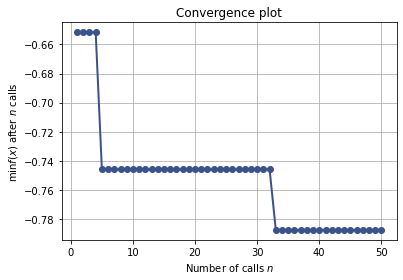

In [ ]:
# Bayesian Optimization
num_thread=50
params = ['min_samples_split', 'min_samples_leaf', 'max_features']

#for model include item_Features
def objective(params):
    # unpack
    min_samples_split, min_samples_leaf, max_features = params
    
    model_iii = DecisionTreeClassifier(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, random_state=60616)
    model_iii.fit(X_train, y_train)
    
    y_pred = model_iii.predict(X_test)
    fbeta = fbeta_score(y_test, y_pred, beta=0.5, average='weighted')

    out = -fbeta
    # Handle some numerical issue going on
    if np.abs(out + 1) < 0.01 or out < -1.0:
        return 0.0
    else:
        return out

space = [(5, 10, 15, 20, 25, 30, 35),
         (2, 6, 10, 14, 18, 22, 26, 30),
         ('auto', 'sqrt', 'log2'),
        ]

try:
    res_fm = forest_minimize(objective, space, n_calls=50,
                     random_state=60616,base_estimator= 'RF',acq_func='PI',
                     verbose=True, n_jobs=num_thread)
except ValueError:
    print('Forest diverged, random search intialized')
    res_fm = dummy_minimize(objective, space, n_calls=30,
         random_state=60616,
         verbose=True)

print('Maximimum F_Beta found: {:6.5f}'.format(-res_fm.fun))
print('Optimal parameters:')

for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))
from skopt.plots import plot_convergence
plot_convergence(res_fm);

# Random Forest Classifier

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.6275
Function value obtained: -0.8391
Current minimum: -0.8391
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 5.3421
Function value obtained: -0.8605
Current minimum: -0.8605
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.9126
Function value obtained: -0.8048
Current minimum: -0.8605
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 6.7397
Function value obtained: -0.8574
Current minimum: -0.8605
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 11.9579
Function value obtained: -0.8878
Current minimum: -0.8878
Iteration No: 6 started.

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 8.8564
Function value obtained: -0.8781
Current minimum: -0.8878
Iteration No: 20 started. Searching for the next optimal point.
Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 9.1603
Function value obtained: -0.8824
Current minimum: -0.8878
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 8.8624
Function value obtained: -0.8753
Current minimum: -0.8878
Iteration No: 22 started. Searching for the next optimal point.
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 10.2061
Function value obtained: -0.8753
Current minimum: -0.8878
Iteration No: 23 started. Searching for the next optimal point.
Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 1.7469
Function value obtained: -0.8656
Current minimum: -0.8878
Iteration No: 24 s

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 3.2307
Function value obtained: -0.8752
Current minimum: -0.8878
Iteration No: 29 started. Searching for the next optimal point.
Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 6.3476
Function value obtained: -0.8646
Current minimum: -0.8878
Iteration No: 30 started. Searching for the next optimal point.
Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 6.0100
Function value obtained: -0.8778
Current minimum: -0.8878
Iteration No: 31 started. Searching for the next optimal point.
Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 3.0555
Function value obtained: -0.8676
Current minimum: -0.8878
Iteration No: 32 started. Searching for the next optimal point.
Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 4.9844
Function value obtained: -0.8482
Current minimum: -0.8878
Iteration No: 33 st

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 12.0875
Function value obtained: -0.8840
Current minimum: -0.8878
Iteration No: 37 started. Searching for the next optimal point.
Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 6.2514
Function value obtained: -0.8824
Current minimum: -0.8878
Iteration No: 38 started. Searching for the next optimal point.
Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 8.7988
Function value obtained: -0.8796
Current minimum: -0.8878
Iteration No: 39 started. Searching for the next optimal point.
Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 11.5164
Function value obtained: -0.8730
Current minimum: -0.8878
Iteration No: 40 started. Searching for the next optimal point.
Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 3.6511
Function value obtained: -0.8760
Current minimum: -0.8878
Iteration No: 41 

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 12.5660
Function value obtained: -0.8878
Current minimum: -0.8893
Iteration No: 44 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 11.7104
Function value obtained: -0.8730
Current minimum: -0.8893
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 11.7094
Function value obtained: -0.8744
Current minimum: -0.8893
Iteration No: 46 started. Searching for the next optimal point.
Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 8.8617
Function value obtained: -0.8841
Current minimum: -0.8893
Iteration No: 47 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 8.8985
Function value obtained: -0.8841
Current minimum: -0.8893
Iteration No: 48 started. Searching for the next optimal point.
Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 11.8487
Function value obtained: -0.8796
Current minimum: -0.8893
Iteration No: 49 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 11.8654
Function value obtained: -0.8796
Current minimum: -0.8893
Iteration No: 50 started. Searching for the next optimal point.
Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 9.1920
Function value obtained: -0.8870
Current minimum: -0.8893
Maximimum recall found: 0.88928
Optimal parameters:
n_estimators: 160
min_samples_split: 5
min_samples_leaf: 2
max_features: auto


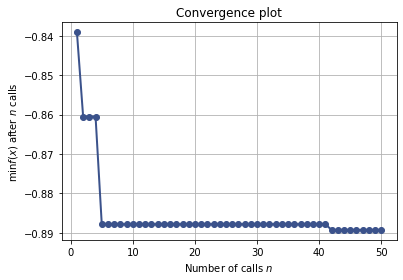

In [ ]:
# Bayesian Optimization
num_thread=50
params = ['n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_features']

#for model include item_Features
def objective(params):
    # unpack
    n_estimators, min_samples_split, min_samples_leaf, max_features = params
    
    model_iii = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, random_state=60616)
    model_iii.fit(X_train, y_train)
    
    y_pred = model_iii.predict(X_test)
    fbeta = fbeta_score(y_test, y_pred, beta=0.5, average='weighted')

    out = -fbeta
    # Handle some numerical issue going on
    if np.abs(out + 1) < 0.01 or out < -1.0:
        return 0.0
    else:
        return out

space = [(20, 40, 60, 80 , 100, 120, 140, 160),
         (5, 10, 15, 20, 25, 30, 35),
         (2, 6, 10, 14, 18, 22, 26, 30),
         ('auto', 'sqrt', 'log2'),
        ]

try:
    res_fm = forest_minimize(objective, space, n_calls=50,
                     random_state=60616,base_estimator= 'RF',acq_func='PI',
                     verbose=True, n_jobs=num_thread)
except ValueError:
    print('Forest diverged, random search intialized')
    res_fm = dummy_minimize(objective, space, n_calls=30,
         random_state=60616,
         verbose=True)

print('Maximimum F_Beta found: {:6.5f}'.format(-res_fm.fun))
print('Optimal parameters:')

for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))
from skopt.plots import plot_convergence
plot_convergence(res_fm);

# AdaBoostClassifier

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 6.3761
Function value obtained: -0.5990
Current minimum: -0.5990
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 9.0770
Function value obtained: -0.5554
Current minimum: -0.5990
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 12.8327
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 6.3816
Function value obtained: -0.5990
Current minimum: -0.6394
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 3.1865
Function value obtained: -0.5356
Current minimum: -0.6394
Iteration No: 6 started.

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 9.7687
Function value obtained: -0.6167
Current minimum: -0.6394
Iteration No: 13 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 12.9289
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 14 started. Searching for the next optimal point.
Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 25.4457
Function value obtained: -0.6136
Current minimum: -0.6394
Iteration No: 15 started. Searching for the next optimal point.
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 19.2619
Function value obtained: -0.6284
Current minimum: -0.6394
Iteration No: 16 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 13.1170
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 17 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 13.2188
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 18 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 13.1679
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 19 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 13.0554
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 20 started. Searching for the next optimal point.
Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 12.2751
Function value obtained: -0.5877
Current minimum: -0.6394
Iteration No: 21 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 12.4554
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 22 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 12.5743
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 23 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 11.9325
Function value obtained: -0.5877
Current minimum: -0.6394
Iteration No: 24 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 12.7928
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 25 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 12.8088
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 26 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 12.5992
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 27 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 12.6361
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 28 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 12.7841
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 29 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 13.1806
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 30 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 13.0780
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 31 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 12.9066
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 32 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 12.1024
Function value obtained: -0.5877
Current minimum: -0.6394
Iteration No: 33 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 14.7328
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 34 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 12.8429
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 35 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 12.8536
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 36 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 12.8580
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 37 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 12.9133
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 38 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 12.7330
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 39 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 12.8462
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 40 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 12.7257
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 41 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 12.8043
Function value obtained: -0.6394
Current minimum: -0.6394
Iteration No: 42 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 11.5292
Function value obtained: -0.5877
Current minimum: -0.6394
Iteration No: 43 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 24.7965
Function value obtained: -0.6136
Current minimum: -0.6394
Iteration No: 44 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 21.5834
Function value obtained: -0.6165
Current minimum: -0.6394
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 15.7432
Function value obtained: -0.6197
Current minimum: -0.6394
Iteration No: 46 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 18.8645
Function value obtained: -0.6284
Current minimum: -0.6394
Iteration No: 47 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 15.5468
Function value obtained: -0.6197
Current minimum: -0.6394
Iteration No: 48 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 3.3131
Function value obtained: -0.5356
Current minimum: -0.6394
Iteration No: 49 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 3.3541
Function value obtained: -0.5356
Current minimum: -0.6394
Iteration No: 50 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 18.6900
Function value obtained: -0.6284
Current minimum: -0.6394
Maximimum recall found: 0.63936
Optimal parameters:
n_estimators: 80
algorithm: SAMME.R


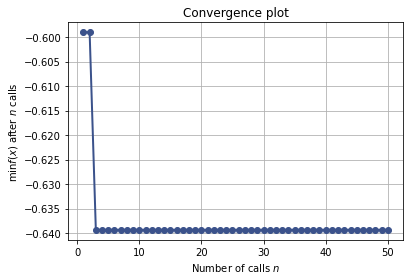

In [ ]:
# Bayesian Optimization
num_thread=50
params = ['n_estimators', 'algorithm']

#for model include item_Features
def objective(params):
    # unpack
    n_estimators, algorithm = params
    
    model_iii = AdaBoostClassifier(n_estimators=n_estimators, algorithm=algorithm, random_state=60616)
    model_iii.fit(X_train, y_train)
    
    y_pred = model_iii.predict(X_test)
    fbeta = fbeta_score(y_test, y_pred, beta=0.5, average='weighted')

    out = -fbeta
    # Handle some numerical issue going on
    if np.abs(out + 1) < 0.01 or out < -1.0:
        return 0.0
    else:
        return out

space = [(20, 40, 60, 80 , 100, 120, 140, 160),
         ('SAMME', 'SAMME.R'),
        ]

try:
    res_fm = forest_minimize(objective, space, n_calls=50,
                     random_state=60616,base_estimator= 'RF',acq_func='PI',
                     verbose=True, n_jobs=num_thread)
except ValueError:
    print('Forest diverged, random search intialized')
    res_fm = dummy_minimize(objective, space, n_calls=30,
         random_state=60616,
         verbose=True)

print('Maximimum F_Beta found: {:6.5f}'.format(-res_fm.fun))
print('Optimal parameters:')

for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))
from skopt.plots import plot_convergence
plot_convergence(res_fm);

# GradientBoostingClassifier

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 8.4061
Function value obtained: -0.6915
Current minimum: -0.6915
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 16.6592
Function value obtained: -0.7182
Current minimum: -0.7182
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 3.2367
Function value obtained: -0.6262
Current minimum: -0.7182
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 22.3998
Function value obtained: -0.7234
Current minimum: -0.7234
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 253.1156
Function value obtained: -0.7711
Current minimum: -0.7711
Iteration No: 6 start

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 188.9226
Function value obtained: -0.7568
Current minimum: -0.7711
Iteration No: 16 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 185.9745
Function value obtained: -0.7568
Current minimum: -0.7711
Iteration No: 17 started. Searching for the next optimal point.
Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 31.1864
Function value obtained: -0.6785
Current minimum: -0.7711
Iteration No: 18 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 188.9441
Function value obtained: -0.7568
Current minimum: -0.7711
Iteration No: 19 started. Searching for the next optimal point.
Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 31.6738
Function value obtained: -0.6833
Current minimum: -0.7711
Iteration No: 20 started. Searching for the next optimal point.
Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 156.4798
Function value obtained: -0.7473
Current minimum: -0.7711
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 214.6874
Function value obtained: -0.7635
Current minimum: -0.7711
Iteration No: 22 started. Searching for the next optimal point.
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 159.7329
Function value obtained: -0.7497
Current minimum: -0.7711
Iteration 

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 95.8708
Function value obtained: -0.7266
Current minimum: -0.7711
Iteration No: 27 started. Searching for the next optimal point.
Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 219.6145
Function value obtained: -0.7645
Current minimum: -0.7711
Iteration No: 28 started. Searching for the next optimal point.
Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 221.8988
Function value obtained: -0.7651
Current minimum: -0.7711
Iteration No: 29 started. Searching for the next optimal point.
Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 225.4746
Function value obtained: -0.7628
Current minimum: -0.7711
Iteration No: 30 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 227.2244
Function value obtained: -0.7628
Current minimum: -0.7711
Iteration No: 31 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 225.0948
Function value obtained: -0.7628
Current minimum: -0.7711
Iteration No: 32 started. Searching for the next optimal point.
Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 224.6456
Function value obtained: -0.7621
Current minimum: -0.7711
Iteration No: 33 started. Searching for the next optimal point.
Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 225.5421
Function value obtained: -0.7641
Current minimum: -0.7711
Iteration No: 34 started. Searching for the next optimal point.
Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 224.8200
Function value obtained: -0.7635
Current minimum: -0.7711
Iteration No: 35 started. Searching for the next optimal point.
Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 94.3079
Function value obtained: -0.7268
Current minimum: -0.7711
Iteration 

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 248.9644
Function value obtained: -0.7711
Current minimum: -0.7711
Iteration No: 39 started. Searching for the next optimal point.
Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 254.4722
Function value obtained: -0.7710
Current minimum: -0.7711
Iteration No: 40 started. Searching for the next optimal point.
Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 254.2512
Function value obtained: -0.7675
Current minimum: -0.7711
Iteration No: 41 started. Searching for the next optimal point.
Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 248.5646
Function value obtained: -0.7706
Current minimum: -0.7711
Iteration No: 42 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 246.4564
Function value obtained: -0.7691
Current minimum: -0.7711
Iteration No: 43 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 251.3743
Function value obtained: -0.7691
Current minimum: -0.7711
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 250.4409
Function value obtained: -0.7707
Current minimum: -0.7711
Iteration No: 45 started. Searching for the next optimal point.


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 240.9894
Function value obtained: -0.7707
Current minimum: -0.7711
Iteration No: 46 started. Searching for the next optimal point.
Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 233.5687
Function value obtained: -0.7675
Current minimum: -0.7711
Iteration No: 47 started. Searching for the next optimal point.
Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 242.8765
Function value obtained: -0.7683
Current minimum: -0.7711
Iteration No: 48 started. Searching for the next optimal point.
Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 33.3045
Function value obtained: -0.7429
Current minimum: -0.7711
Iteration No: 49 started. Searching for the next optimal point.
Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 33.0778
Function value obtained: -0.7392
Current minimum: -0.7711
Iteration N

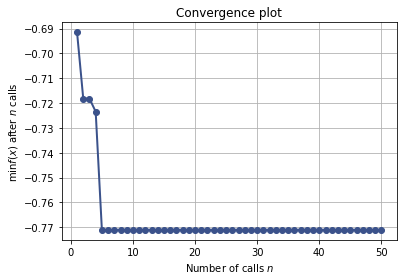

In [ ]:
# Bayesian Optimization
num_thread=50
params = ['n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_features']

#for model include item_Features
def objective(params):
    # unpack
    n_estimators, min_samples_split, min_samples_leaf, max_features = params
    
    model_iii = GradientBoostingClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, random_state=60616)
    model_iii.fit(X_train, y_train)
    
    y_pred = model_iii.predict(X_test)
    fbeta = fbeta_score(y_test, y_pred, beta=0.5, average='weighted')

    out = -fbeta
    # Handle some numerical issue going on
    if np.abs(out + 1) < 0.01 or out < -1.0:
        return 0.0
    else:
        return out

space = [(20, 40, 60, 80 , 100, 120, 140, 160),
         (5, 10, 15, 20, 25, 30, 35),
         (2, 6, 10, 14, 18, 22, 26, 30),
         ('auto', 'sqrt', 'log2'),
        ]

try:
    res_fm = forest_minimize(objective, space, n_calls=50,
                     random_state=60616,base_estimator= 'RF',acq_func='PI',
                     verbose=True, n_jobs=num_thread)
except ValueError:
    print('Forest diverged, random search intialized')
    res_fm = dummy_minimize(objective, space, n_calls=30,
         random_state=60616,
         verbose=True)

print('Maximimum F_Beta found: {:6.5f}'.format(-res_fm.fun))
print('Optimal parameters:')

for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))
from skopt.plots import plot_convergence
plot_convergence(res_fm);

# XG Boost

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 71.2182
Function value obtained: -0.6114
Current minimum: -0.6114
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 42.5485
Function value obtained: -0.5038
Current minimum: -0.6114
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 71.4665
Function value obtained: -0.8643
Current minimum: -0.8643
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 103.9020
Function value obtained: -0.6474
Current minimum: -0.8643
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 177.2520
Function value obtained: -0.8720
Current minimum: -0.8720
Iteration No: 6 st

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 167.2040
Function value obtained: -0.8803
Current minimum: -0.8880
Iteration No: 49 started. Searching for the next optimal point.
Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 178.2730
Function value obtained: -0.7409
Current minimum: -0.8880
Iteration No: 50 started. Searching for the next optimal point.
Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 179.5508
Function value obtained: -0.7457
Current minimum: -0.8880
Maximimum F_Beta found: 0.88800
Optimal parameters:
learning_rate: 0.9
gamma: 0.25
max_depth: 10
min_child_weight: 5
reg_lambda: 1
reg_alpha: 0.75


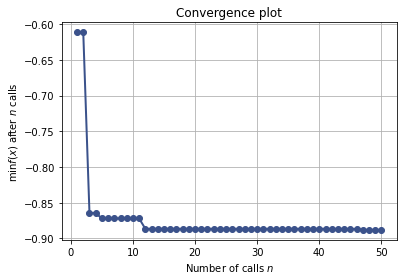

In [28]:
# Bayesian Optimization
num_thread=50
params = ['learning_rate', 'gamma', 'max_depth', 'min_child_weight', 'reg_lambda', 'reg_alpha']

#for model include item_Features
def objective(params):
    # unpack
    learning_rate, gamma, max_depth, min_child_weight, reg_lambda, reg_alpha = params
    
    model_iii = XGBClassifier(learning_rate=learning_rate, gamma=gamma, max_depth=max_depth, min_child_weight=min_child_weight, reg_lambda=reg_lambda, reg_alpha=reg_alpha)
    model_iii.fit(X_train, y_train)
    
    y_pred = model_iii.predict(X_test)
    fbeta = fbeta_score(y_test, y_pred, beta=0.5, average='weighted')

    out = -fbeta
    # Handle some numerical issue going on
    if np.abs(out + 1) < 0.01 or out < -1.0:
        return 0.0
    else:
        return out

space = [(0.0001, 0.0009, 0.001, 0.009, 0.1, 0.9),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
         (2, 4, 6, 8, 10),
         (1,3,5,7,9),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
        ]

try:
    res_fm = forest_minimize(objective, space, n_calls=50,
                     random_state=60616,base_estimator= 'RF',acq_func='PI',
                     verbose=True, n_jobs=num_thread)
except ValueError:
    print('Forest diverged, random search intialized')
    res_fm = dummy_minimize(objective, space, n_calls=30,
         random_state=60616,
         verbose=True)

print('Maximimum F_Beta found: {:6.5f}'.format(-res_fm.fun))
print('Optimal parameters:')

for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))
from skopt.plots import plot_convergence
plot_convergence(res_fm);